# Cryptocurrency Prediction Using LSTM

### Importing Relevent Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Datasets\coin_Bitcoin (1).csv")


In [4]:
df.shape

(2991, 10)

In [5]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,4/29/2013,147.488007,134.000000,134.444000,144.539993,2.219410e+09,1.603769e+09
1,2,Bitcoin,BTC,4/30/2013,146.929993,134.050003,144.000000,139.000000,2.219410e+09,1.542813e+09
2,3,Bitcoin,BTC,05-01-2013,139.889999,107.720001,139.000000,116.989998,2.219410e+09,1.298955e+09
3,4,Bitcoin,BTC,05-02-2013,125.599998,92.281898,116.379997,105.209999,2.219410e+09,1.168517e+09
4,5,Bitcoin,BTC,05-03-2013,108.127998,79.099998,106.250000,97.750000,2.219410e+09,1.085995e+09


In [6]:
date=df["Date"]
close=df["Close"]

In [8]:
df1=df.reset_index()['Close']

<AxesSubplot:xlabel='Date'>

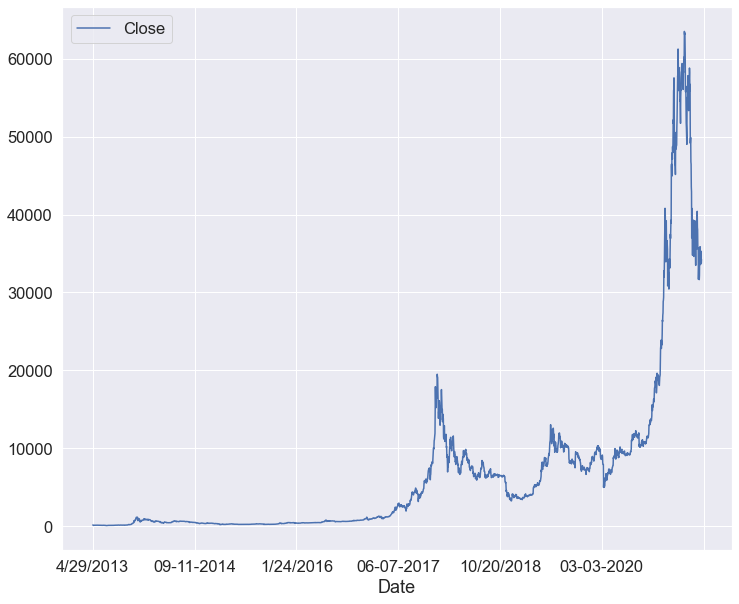

In [9]:
import matplotlib.pyplot as plt

df.plot(x='Date',y='Close',figsize=(12,10))

In [10]:
df1

0         144.539993
1         139.000000
2         116.989998
3         105.209999
4          97.750000
            ...     
2986    33897.048590
2987    34668.548400
2988    35287.779770
2989    33746.002460
2990    34235.193450
Name: Close, Length: 2991, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.00119979],
       [0.00111246],
       [0.00076549],
       ...,
       [0.5552035 ],
       [0.53089867],
       [0.53861036]])

In [13]:
sup=df1

In [14]:
df1=df1[:2961]


In [15]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(2220, 741)

In [17]:
train_data

array([[0.00119979],
       [0.00111246],
       [0.00076549],
       ...,
       [0.12586284],
       [0.13564722],
       [0.13773695]])

In [18]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 80
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(2139, 80)
(2139,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(660, 80)
(660,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(80,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_percentage_error'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 80, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=50,verbose=2)

Epoch 1/200
43/43 - 9s - loss: 5.2599e-04 - mean_absolute_percentage_error: 143.2061 - val_loss: 0.0096 - val_mean_absolute_percentage_error: 15.4527
Epoch 2/200
43/43 - 5s - loss: 1.4181e-04 - mean_absolute_percentage_error: 85.8019 - val_loss: 0.0050 - val_mean_absolute_percentage_error: 8.9461
Epoch 3/200
43/43 - 6s - loss: 1.0981e-04 - mean_absolute_percentage_error: 52.0608 - val_loss: 0.0100 - val_mean_absolute_percentage_error: 12.9222
Epoch 4/200
43/43 - 5s - loss: 1.1068e-04 - mean_absolute_percentage_error: 64.7711 - val_loss: 0.0063 - val_mean_absolute_percentage_error: 9.4485
Epoch 5/200
43/43 - 7s - loss: 8.3857e-05 - mean_absolute_percentage_error: 42.2519 - val_loss: 0.0091 - val_mean_absolute_percentage_error: 9.8777
Epoch 6/200
43/43 - 6s - loss: 7.4207e-05 - mean_absolute_percentage_error: 31.4508 - val_loss: 0.0066 - val_mean_absolute_percentage_error: 10.9113
Epoch 7/200
43/43 - 7s - loss: 1.0570e-04 - mean_absolute_percentage_error: 71.6416 - val_loss: 0.0106 - val

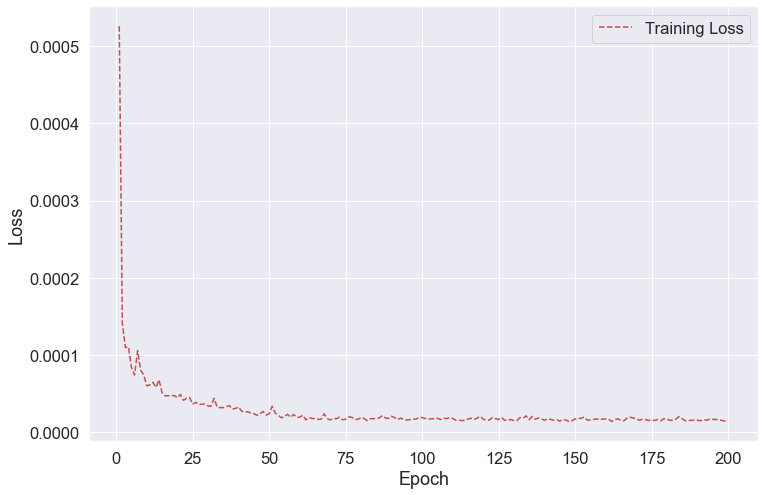

In [29]:
loss = history.history['loss']
epoch = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

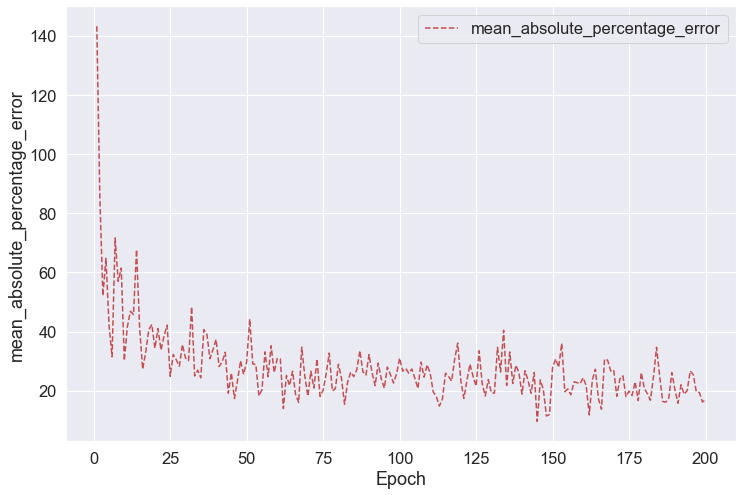

In [30]:
mean_absolute_percentage_error = history.history['mean_absolute_percentage_error']
epoch = range(1, len(mean_absolute_percentage_error) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch,mean_absolute_percentage_error, 'r--')
plt.legend(['mean_absolute_percentage_error'])
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_percentage_error')
plt.show();

In [31]:
loss_and_metrics = model.evaluate(X_test, ytest, verbose=1)

21/21 [==============================] - 1s 24ms/step - loss: 0.0014 - mean_absolute_percentage_error: 3.8331


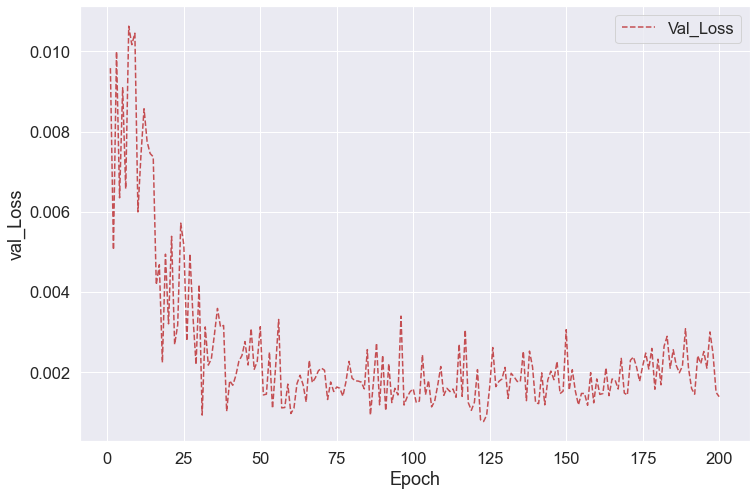

In [32]:
val_loss = history.history['val_loss']
epoch = range(1, len(val_loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch,val_loss, 'r--')
plt.legend(['Val_Loss'])
plt.xlabel('Epoch')
plt.ylabel('val_Loss')
plt.show();

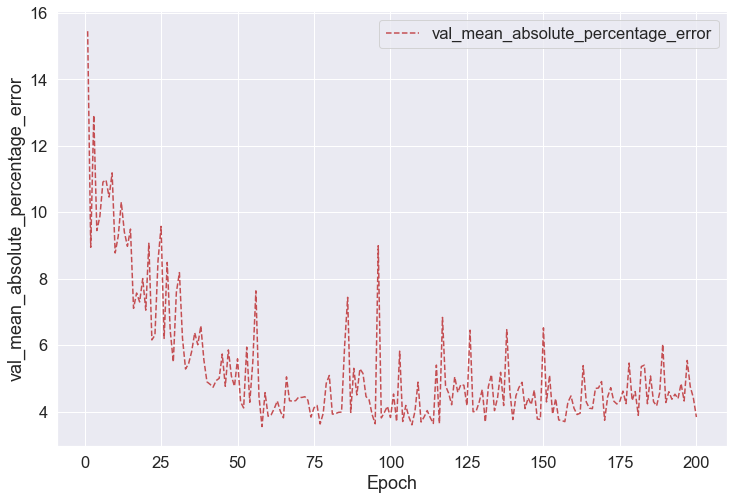

In [33]:
val_mean_absolute_percentage_error = history.history['val_mean_absolute_percentage_error']
epoch = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch, val_mean_absolute_percentage_error, 'r--')
plt.legend(['val_mean_absolute_percentage_error'])
plt.xlabel('Epoch')
plt.ylabel('val_mean_absolute_percentage_error')
plt.show();

In [34]:
print("Test loss", loss_and_metrics[0])
print("Test error", loss_and_metrics[1])

Test loss 0.0013781364541500807
Test error 3.833112955093384


In [35]:
import tensorflow as tf

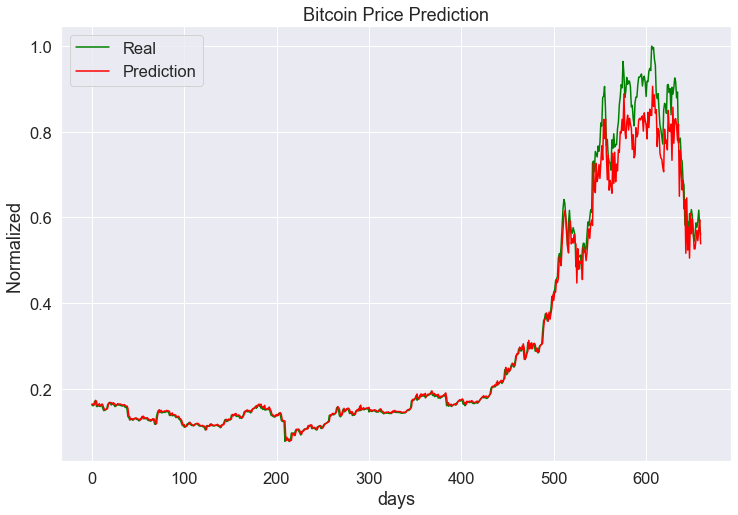

In [36]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.xlabel('days')
plt.ylabel('Normalized ')
plt.plot(ytest, color='green', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

In [37]:
tf.__version__

'2.3.0'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
train_predict

array([[-0.00284677],
       [-0.00295137],
       [-0.00294991],
       ...,
       [ 0.12482926],
       [ 0.12642238],
       [ 0.12744519]], dtype=float32)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_train,train_predict)*100
print(mape)

0.32686207080575164


In [41]:
### Test Data RMSE
mape = mean_absolute_error(ytest,test_predict)*100
print(mape)

1.8003900141991207


In [42]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_absolute_error


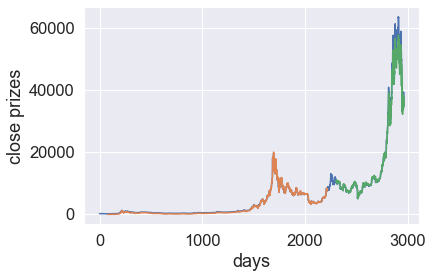

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=80
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot()
plt.ylabel('close prizes')
plt.xlabel('days')
plt.show()

In [45]:
len(test_data)

741

In [46]:
x_input=test_data[661:741].reshape(1,-1)
x_input.shape

(1, 80)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [48]:
temp_input

[0.9187072945413742,
 0.9181869138999929,
 0.9057297327771879,
 0.8585274925496741,
 0.8618348028820354,
 0.8308632508062308,
 0.8139939939967902,
 0.8681147529234864,
 0.8812966990889632,
 0.8809378268522566,
 0.9093047116331029,
 0.9277092625018825,
 0.9277272282860107,
 0.9305170949978924,
 0.935065140359602,
 0.9069982461505408,
 0.9252006049399489,
 0.9299191759642691,
 0.9162749744578708,
 0.8824857420144585,
 0.9183494576947853,
 0.9171048680127027,
 0.9415114535368582,
 0.9480020238089064,
 0.9430912822978706,
 0.9999999999999999,
 0.993792672297073,
 0.9970135256629065,
 0.9695646329255416,
 0.9555507921025906,
 0.8851222537035591,
 0.8773675805552217,
 0.8891712356687195,
 0.8487055126412367,
 0.8149100513047488,
 0.8043697966165103,
 0.7879312051874129,
 0.7714321980828527,
 0.8505289017938449,
 0.866472194781049,
 0.8631867368867976,
 0.8431726142255717,
 0.9093043566241892,
 0.9105319635752454,
 0.8916626845991945,
 0.9006358629447475,
 0.8396797373289691,
 0.9041625380456

In [49]:
from numpy import array

lst_output=[]
n_steps=80
i=0
while(i<30):
    
    if(len(temp_input)>80):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.54734707]
81
1 day input [0.91818691 0.90572973 0.85852749 0.8618348  0.83086325 0.81399399
 0.86811475 0.8812967  0.88093783 0.90930471 0.92770926 0.92772723
 0.93051709 0.93506514 0.90699825 0.9252006  0.92991918 0.91627497
 0.88248574 0.91834946 0.91710487 0.94151145 0.94800202 0.94309128
 1.         0.99379267 0.99701353 0.96956463 0.95555079 0.88512225
 0.87736758 0.88917124 0.84870551 0.81491005 0.8043698  0.78793121
 0.7714322  0.8505289  0.86647219 0.86318674 0.84317261 0.90930436
 0.91053196 0.89166268 0.90063586 0.83967974 0.90416254 0.88796499
 0.90309682 0.92591345 0.91690487 0.8795041  0.89282128 0.77373819
 0.78265531 0.78524602 0.73605637 0.73126204 0.6852536  0.67535196
 0.58223368 0.64182691 0.58699841 0.59065475 0.54705033 0.60908854
 0.6043001  0.61836131 0.60484782 0.56166407 0.54461452 0.56135703
 0.58744237 0.57722831 0.59126244 0.61701456 0.5805306  0.55936806
 0.56426155 0.54734707]
1 day output [[0.52140486]]
2 day input [0.90572973 0.85852749 0.8618348  0.8

In [50]:
day_new=np.arange(1,81)
day_pred=np.arange(81,111)

In [51]:
lst_output

[[0.5473470687866211],
 [0.5214048624038696],
 [0.49916526675224304],
 [0.48114168643951416],
 [0.4657455384731293],
 [0.4519629180431366],
 [0.43934768438339233],
 [0.42777833342552185],
 [0.41725850105285645],
 [0.4078018069267273],
 [0.39938607811927795],
 [0.3919483423233032],
 [0.3853971064090729],
 [0.37962794303894043],
 [0.37453559041023254],
 [0.37002232670783997],
 [0.36600250005722046],
 [0.36240342259407043],
 [0.3591656982898712],
 [0.35624197125434875],
 [0.3535947799682617],
 [0.35119572281837463],
 [0.34902265667915344],
 [0.3470587730407715],
 [0.3452906608581543],
 [0.3437073230743408],
 [0.3422991633415222],
 [0.3410571813583374],
 [0.3399723172187805],
 [0.3390355706214905]]

In [52]:
tir_run=sup[2961:2991].reshape(-1,1)
tir_run.shape
tir_run

array([[0.52797766],
       [0.52658921],
       [0.58763576],
       [0.57750694],
       [0.58746674],
       [0.55937686],
       [0.61526623],
       [0.63293182],
       [0.63589219],
       [0.60343053],
       [0.59880282],
       [0.56307714],
       [0.56037555],
       [0.56167495],
       [0.49827775],
       [0.51134571],
       [0.53053651],
       [0.54534547],
       [0.49766431],
       [0.50631092],
       [0.54514383],
       [0.54174966],
       [0.56434668],
       [0.55131066],
       [0.52815752],
       [0.53327979],
       [0.54544183],
       [0.5552035 ],
       [0.53089867],
       [0.53861036]])

In [53]:
mape = mean_absolute_error(tir_run,lst_output)*100
print(mape)


16.148158695597953


In [54]:
import matplotlib.pyplot as plt

In [55]:
len(sup)

2991

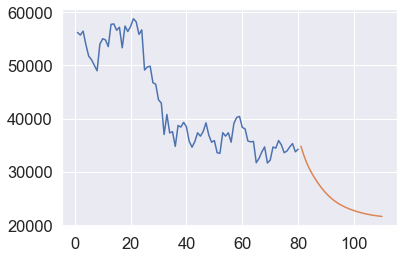

In [56]:
plt.plot(day_new,scaler.inverse_transform(sup[2911:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

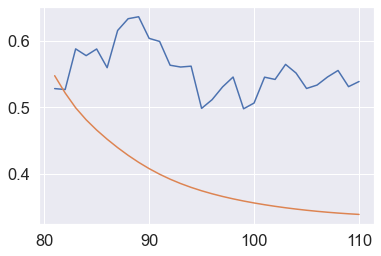

In [57]:
plt.plot(day_pred,(sup[2961:2991]))
plt.plot(day_pred,lst_output)

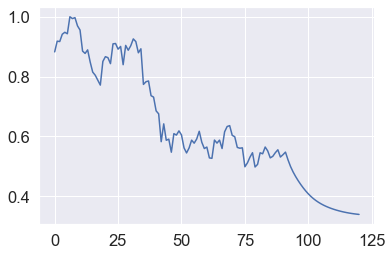

In [58]:
df3=sup.tolist()
df3.extend(lst_output)
plt.plot(df3[2900:])

In [59]:


df3=scaler.inverse_transform(df3).tolist()



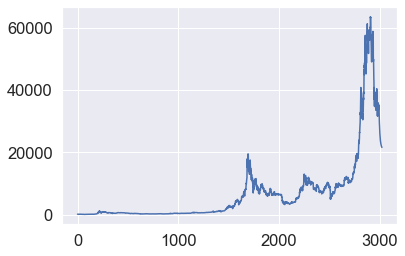

In [60]:


plt.plot(df3)

